In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Datasets

In [2]:
#loading all 3 training data sets
TD=pd.read_csv('ml_case_training_data.csv')  #loading training data csv
Hist=pd.read_csv('ml_case_training_hist_data.csv') #loading historic training data
Out=pd.read_csv('ml_case_training_output.csv') #loading training output data

#### Displaying sample data from all 3 datasets

In [3]:
TD.sample(2)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
6318,65a7dfc19d9273e886d6dfa8af2b2ba7,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,12477,0,0,2012-06-20,2016-06-20,2012-06-20,...,44.311378,f,0.0,16.92,16.92,1,64.89,4,lxidpiddsbxsbosboudacockeimpuepw,10.392
7582,218711b4d413613bdfcf4e15737da584,cfdsselwimsklimddecfifseabdkxfcs,NaN,foosdfpfkusacimwkcsosbicdxkicaua,122531,0,3219,2013-01-14,2016-07-01,NaN,...,44.311378,f,0.0,13.10,13.10,1,185.12,3,ldkssxwpmemidmecebumciepifcamkci,10.392


In [4]:
Hist.sample(2)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
72253,d18670525d6041992d9e7d1253fa60de,2015-07-01,0.129808,0.107582,0.075514,40.728885,24.437330,16.291555
124067,93ce80e23043aa0817d2c640504e2302,2015-03-01,0.124820,0.102239,0.070381,40.565969,24.339581,16.226389


In [5]:
Out.sample(2)

,id,churn
5398,c8d60506b9f17226887b07a0f6276a9a,0
10338,a4963ca6e1bf3363be0806525647d27f,0


In [6]:
train_set=pd.merge(TD,Out,on='id')
train_set.tail(5)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,NaN,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,NaN,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,NaN,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,2009-12-18,2016-12-17,NaN,...,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


#### Checking datatypes of each dataframe

In [7]:
train_set.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

In [8]:
Hist.dtypes

id               object
price_date       object
price_p1_var    float64
price_p2_var    float64
price_p3_var    float64
price_p1_fix    float64
price_p2_fix    float64
price_p3_fix    float64
dtype: object

In [9]:
Out.dtypes

id       object
churn     int64
dtype: object

#### Getting data statistics

In [10]:
train_set.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


With above, we know that:
1. Column 'campaign_disc_ele' is entirely empty. The empty column can either be removed all together or can be placed with a median value, which at the moment isn't available.
2. The percentile data from 25-75% shows that data is skewed for most of the columns.
3. Columns related to consumption and forecasts show negative data, we will assume this to be not accurate. 

In [11]:
Hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


With the stats above for Historic data, we know:
1. The columns related to fixed price has negative data, we will clean this in the coming steps.

In [12]:
Out.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


#### Checking for missing/nan values in datasets

In [13]:
print('Total Count of NaN values in training set Dataset: ',train_set.isnull().sum().sum())
pd.DataFrame({'Missing Values % ':train_set.isnull().sum()/len(train_set.index)*100})

Total Count of NaN values in training set Dataset:  93633


,Missing Values %
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


With the above cell, see that a lot of columns have missing, i.e. NaN values, accounting for more than 75%. Due to a large % of missing data, we will proceed with removing these columns.

In [14]:
print('Total Count of NaN values in Historic training Dataset: ',Hist.isnull().sum().sum())
pd.DataFrame({'Missing Values % ':Hist.isnull().sum()/len(Hist.index)*100})

Total Count of NaN values in Historic training Dataset:  8154


,Missing Values %
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


For the historic dataset, we have a low % of missing data. Therefore, we will opt to replace the missing data with median values. 

## Visualizing the data

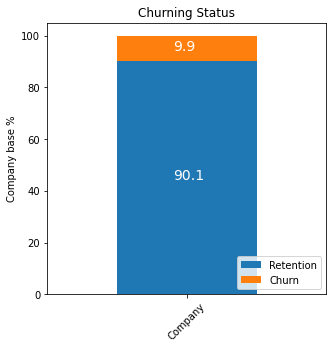

In [15]:
churn=train_set[['id','churn']]
churn.columns=['Company','churn']
def plotstacked(df,title,size=(15,10),rot=45,legend_='upper right'):
    ax=df.plot(kind='bar',stacked=True,
              figsize=size,rot=rot,title=title)
    annotstacked(ax,textsize=14)
    plt.legend(['Retention','Churn'],loc=legend_)
    plt.ylabel('Company base %')
    

def annotstacked(ax,pad=0.99,colour="white",textsize=13):
    """Add value annotations to the bars"""
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        # Calculate annotation
        value=str(round(p.get_height(),1))# If value is 0 do not annotate
        if value=='0.0':
            continue
        ax.annotate(value,((p.get_x()+p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),color=colour,size=textsize,)
    

churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100

#ax.ylabel('Company % Base')

plotstacked(churn_percentage.transpose(),'Churning Status',(5,5),legend_='lower right')

With above, we can see that about 10 % of all customers ave churned.

In [16]:
ch_activity=train_set[['id','activity_new','churn']]
ch_activity=ch_activity.groupby([ch_activity['activity_new'],
                                ch_activity['churn']])['id'].count().unstack(level=1).sort_values(by=[0],
                                                                                                 ascending=False)

([], [])

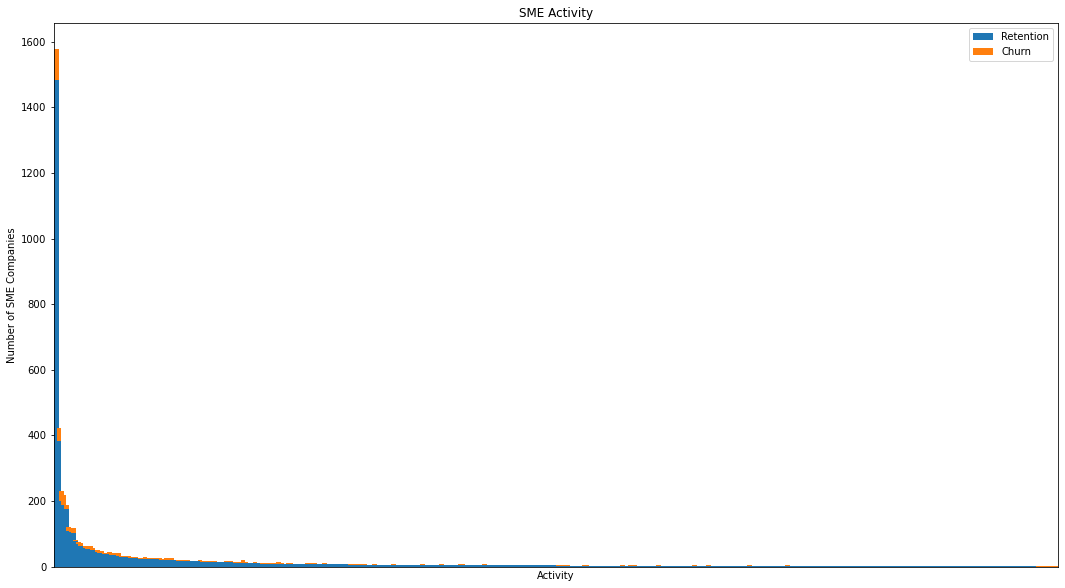

In [17]:
ch_activity.plot(kind='bar',figsize=(18,10),width=2,
                stacked=True,title='SME Activity')
plt.ylabel('Number of SME Companies')
plt.xlabel('Activity')
plt.legend(['Retention','Churn'],loc=0)
plt.xticks([])

In [18]:
ch_activity_total=ch_activity.fillna(0)[0]+ch_activity.fillna(0)[1]
ch_ac_per=ch_activity.fillna(0)[1]/(ch_activity_total)*100

pd.DataFrame({'Churn Percentage':ch_ac_per,
             'Total Companies':ch_activity_total}).sort_values(by='Churn Percentage',
                                                              ascending=False).head(10)

,Churn Percentage,Total Companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


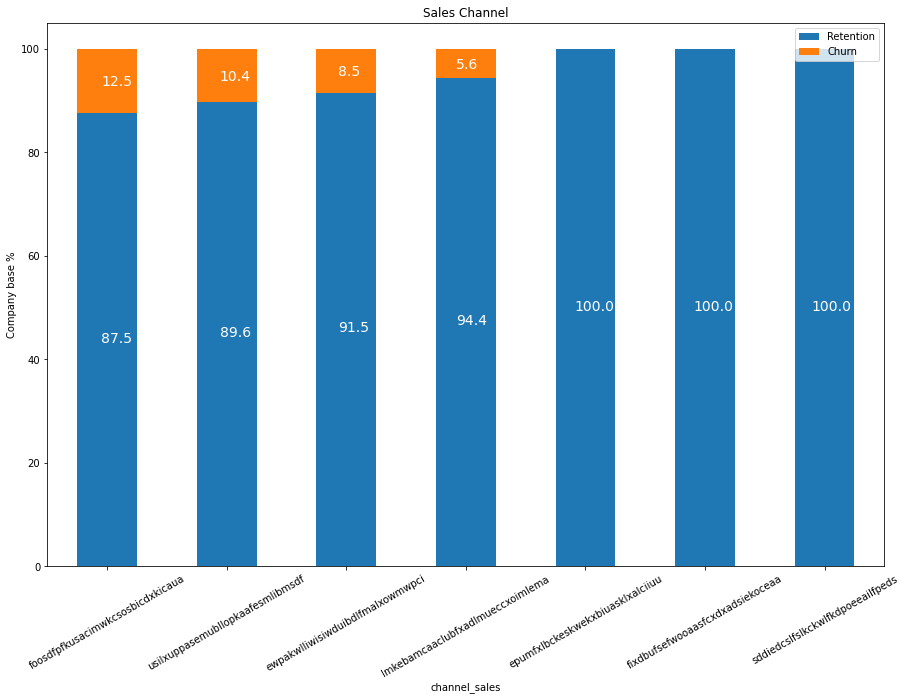

In [19]:
channel=train_set[['id','channel_sales','churn']]
channel=channel.groupby([channel['channel_sales'],
                        channel['churn']])['id'].count().unstack(level=1).fillna(0)

channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

plotstacked(channel_churn,'Sales Channel',rot=30)

In [20]:
channel_total=channel.fillna(0)[0]+channel.fillna(0)[1]
channel_per=channel.fillna(0)[1]/(channel_total)*100

pd.DataFrame({'Churn Percentage':channel_per,
             'Total Companies':channel_total}).sort_values(by='Churn Percentage',
                                                              ascending=False).head(10)

,Churn Percentage,Total Companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


In [21]:
consumption=train_set[['id','cons_12m','cons_gas_12m',
                      'cons_last_month','imp_cons',
                      'has_gas','churn']]

def plotdist(dataframe,column,ax,binss=50):
    tempdf=pd.DataFrame({'Retention':dataframe[dataframe['churn']==0][column],
                        'Churn':dataframe[dataframe['churn']==1][column]})
    tempdf[['Retention','Churn']].plot(kind='hist',bins=binss,ax=ax,stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain',axis='x')

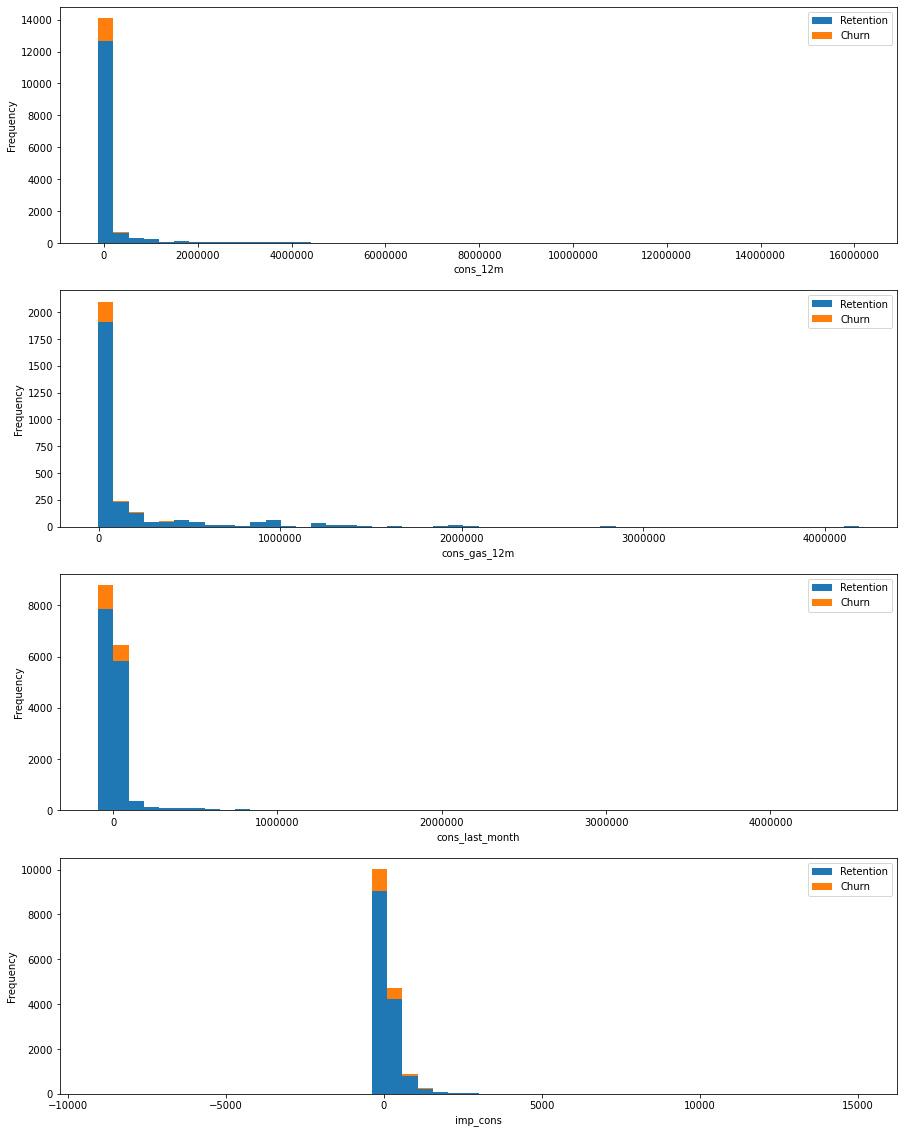

In [22]:
fig,axes=plt.subplots(nrows=4,figsize=(15,20))
plotdist(consumption,'cons_12m',axes[0])
plotdist(consumption[consumption['has_gas']=='t'],'cons_gas_12m',axes[1])
plotdist(consumption,'cons_last_month',axes[2])
plotdist(consumption,'imp_cons',axes[3])

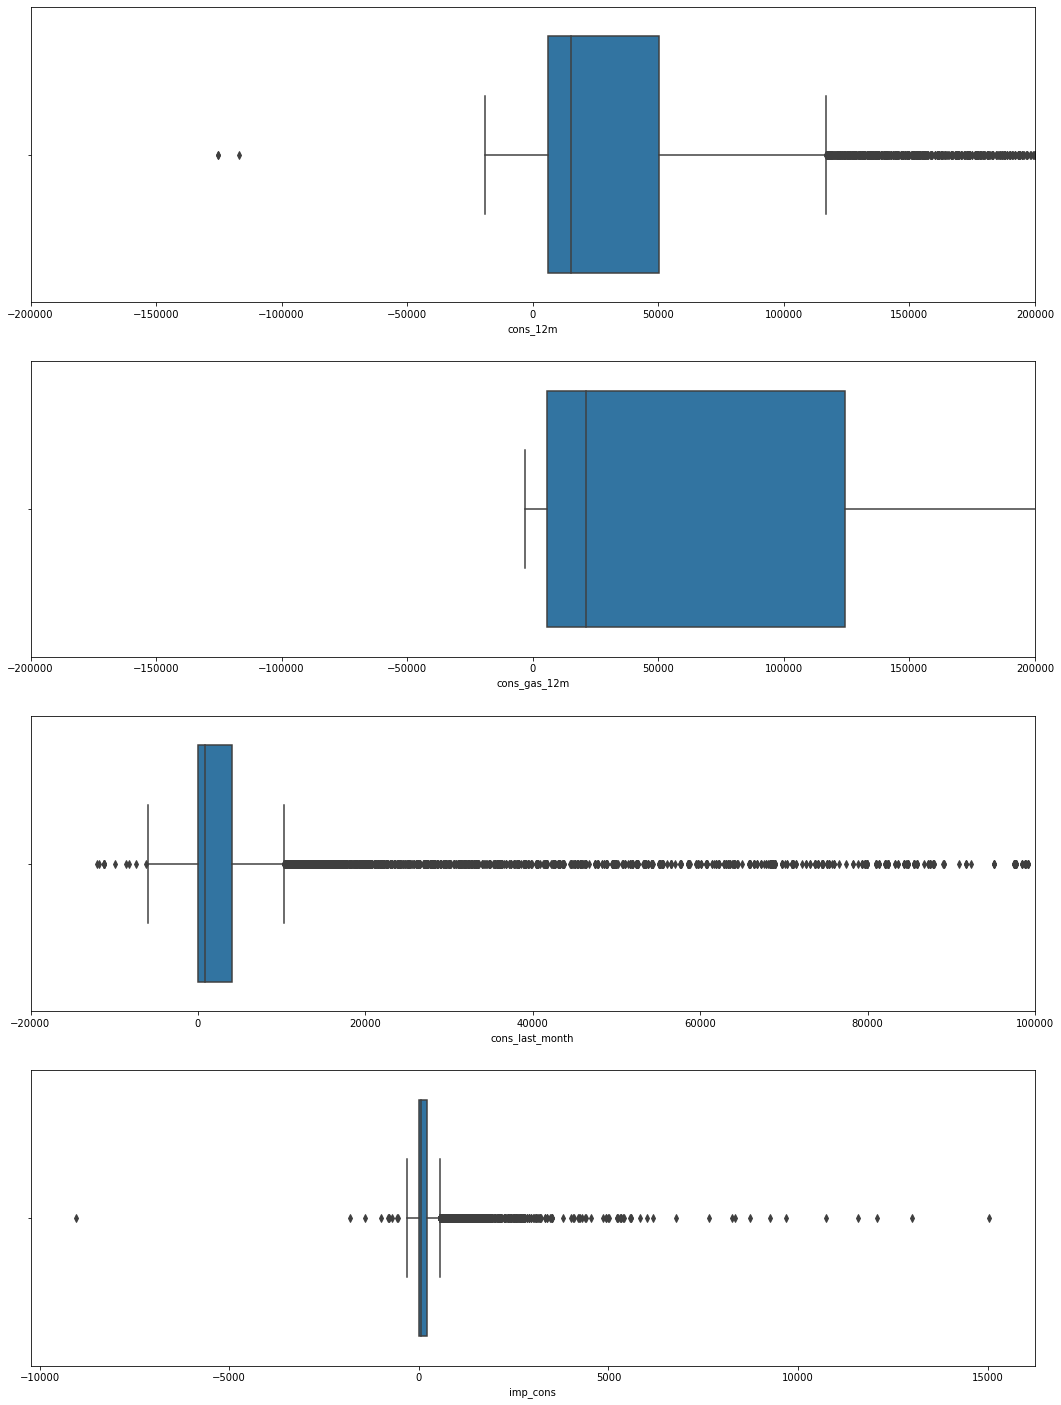

In [23]:
fig,axes=plt.subplots(nrows=4,figsize=(18,25))
sns.boxplot(consumption['cons_12m'],ax=axes[0])
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_gas_12m'],ax=axes[1])
sns.boxplot(consumption['cons_last_month'],ax=axes[2])
sns.boxplot(consumption['imp_cons'],ax=axes[3])
for ax in axes:
    ax.ticklabel_format(style='plain',axis='x')
axes[0].set_xlim(-200000,200000)
axes[1].set_xlim(-200000,200000)
axes[2].set_xlim(-20000,100000)
plt.show()

In [24]:
#working with dates data
dates=train_set[['id','date_activ','date_end','date_modif_prod','date_renewal','churn']].copy()
dates['date_activ']=pd.to_datetime(dates['date_activ'],format='%Y-%m-%d')
dates['date_end']=pd.to_datetime(dates['date_end'],format='%Y-%m-%d')
dates['date_modif_prod']=pd.to_datetime(dates['date_modif_prod'],format='%Y-%m-%d')
dates['date_renewal']=pd.to_datetime(dates['date_renewal'],format='%Y-%m-%d')

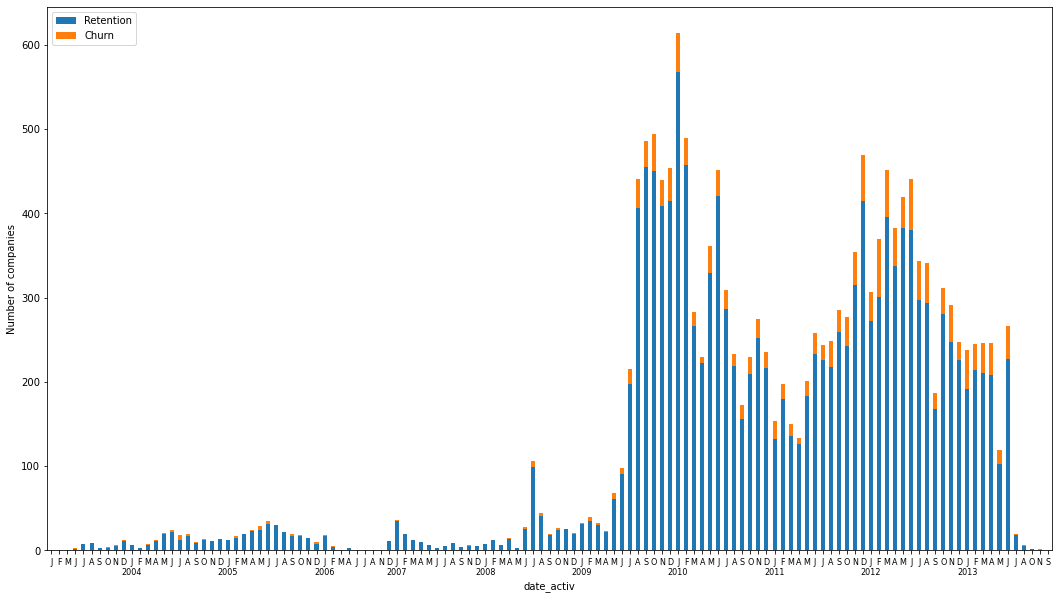

In [25]:
def plotdates(dataframe,column,fntsize=12):
    tempp=dataframe[[column,'churn',
                     'id']].set_index(column).groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
    ax=tempp.plot(kind='bar',stacked=True,figsize=(18,10),rot=0)
    ax.set_xticklabels(map(lambda x: lineformat(x),tempp.index))
    plt.xticks(fontsize=fntsize)
    plt.ylabel('Number of companies')
    plt.legend(['Retention','Churn'],loc='upper left')
    plt.show()
    
def lineformat(label):
    month=label.month_name()[:1]
    if label.month_name()=='January':
        month += f'\n{label.year}'
    return month

plotdates(dates,'date_activ',fntsize=8)

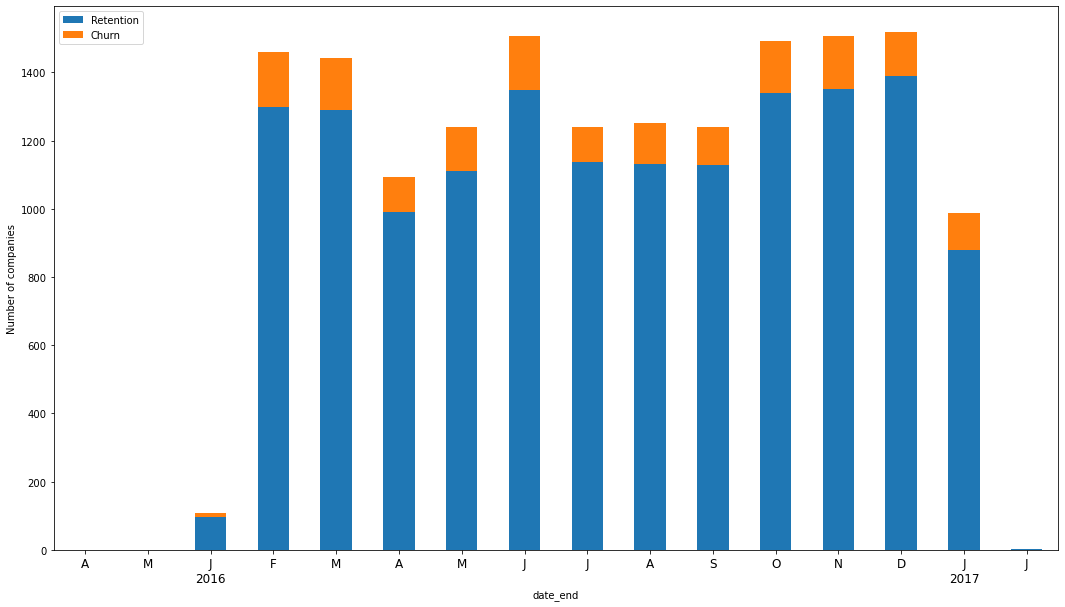

In [26]:
plotdates(dates,'date_end')

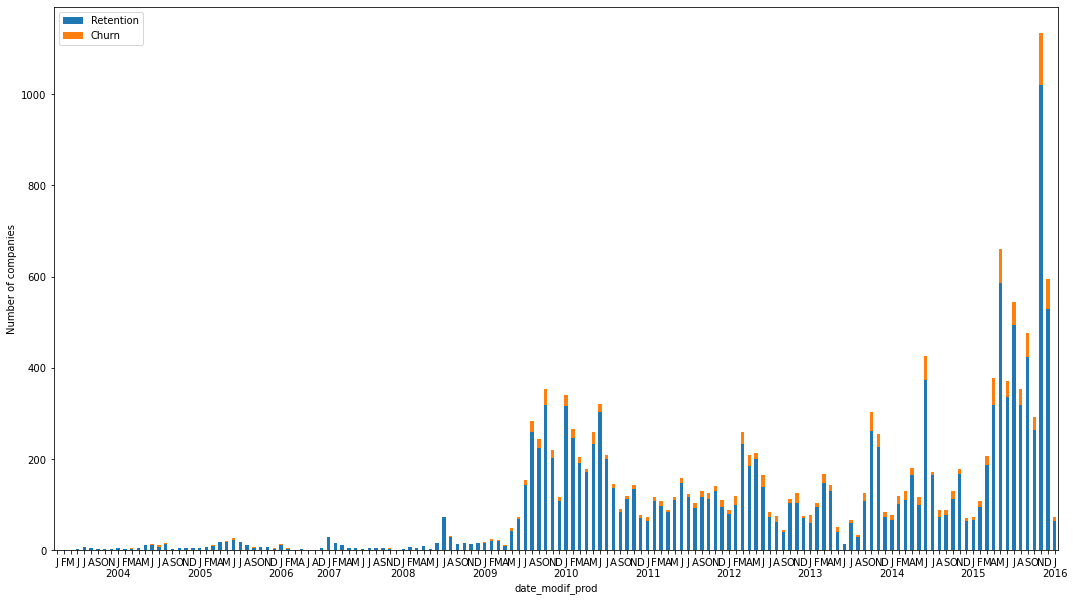

In [27]:
plotdates(dates,'date_modif_prod',fntsize=10)

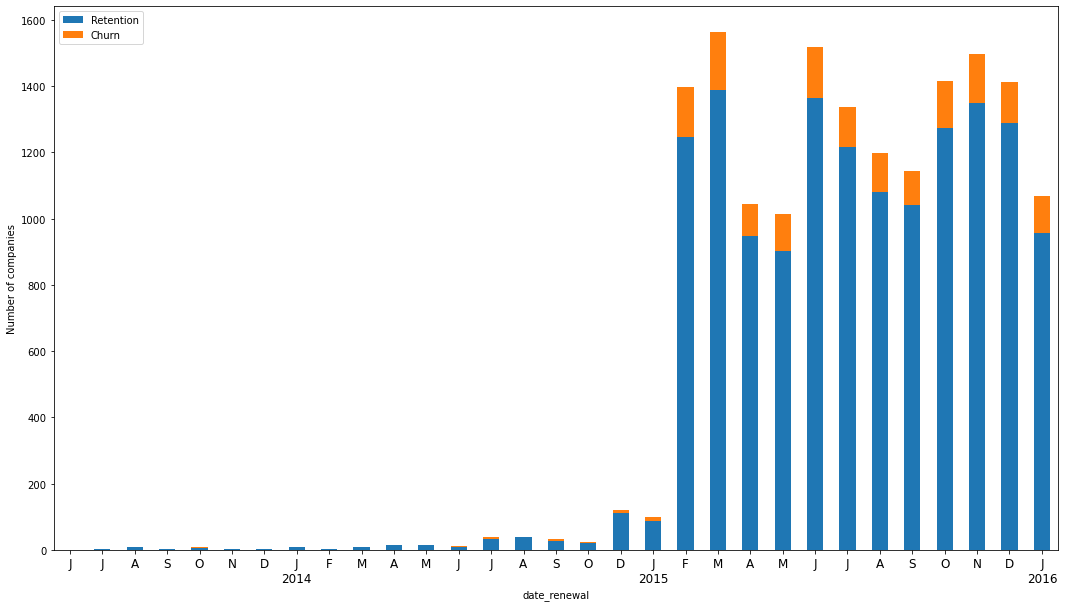

In [28]:
plotdates(dates,'date_renewal')

In [29]:
forecast=train_set[['id','forecast_base_bill_ele',
                   'forecast_base_bill_year',
                   'forecast_bill_12m','forecast_cons',
                   'forecast_cons_12m',
                   'forecast_cons_year','forecast_discount_energy',
                   'forecast_meter_rent_12m','forecast_price_energy_p1',
                   'forecast_price_energy_p2',
                   'forecast_price_pow_p1','churn']]

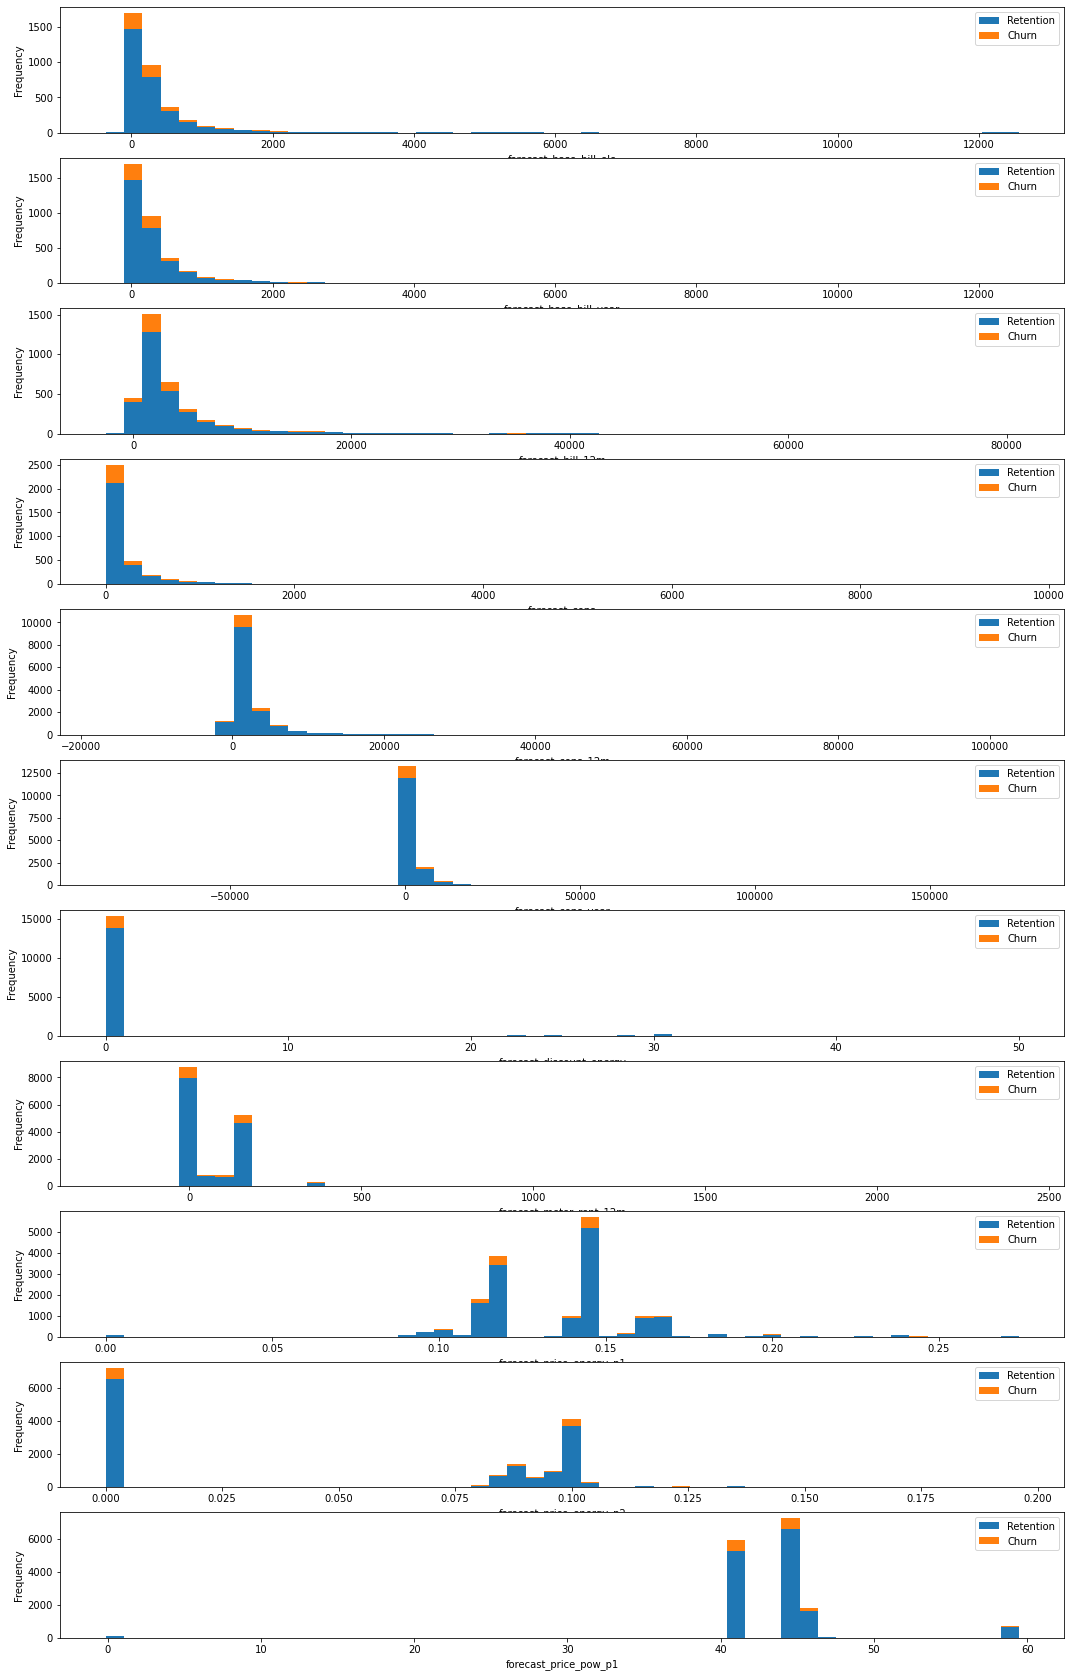

In [30]:
fig,axes=plt.subplots(nrows=11,figsize=(18,30))
plotdist(train_set,'forecast_base_bill_ele',axes[0])
plotdist(train_set,"forecast_base_bill_year",axes[1])
plotdist(train_set,"forecast_bill_12m",axes[2])
plotdist(train_set,'forecast_cons',axes[3])
plotdist(train_set,'forecast_cons_12m',axes[4])
plotdist(train_set,'forecast_cons_year',axes[5])
plotdist(train_set,'forecast_discount_energy',axes[6])
plotdist(train_set,'forecast_meter_rent_12m',axes[7])
plotdist(train_set,'forecast_price_energy_p1',axes[8])
plotdist(train_set,'forecast_price_energy_p2',axes[9])
plotdist(train_set,'forecast_price_pow_p1',axes[10])

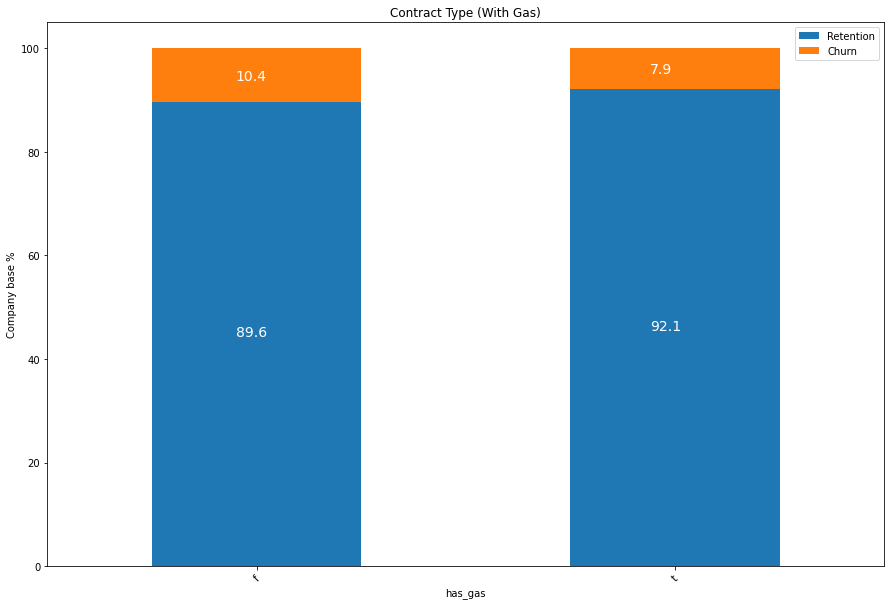

In [31]:
cont_type=train_set[['id','has_gas','churn']]
contract=cont_type.groupby([cont_type['churn'],
                           cont_type['has_gas']])['id'].count().unstack(level=0)

cont_percentage=(contract.div(contract.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
plotstacked(cont_percentage,'Contract Type (With Gas)')

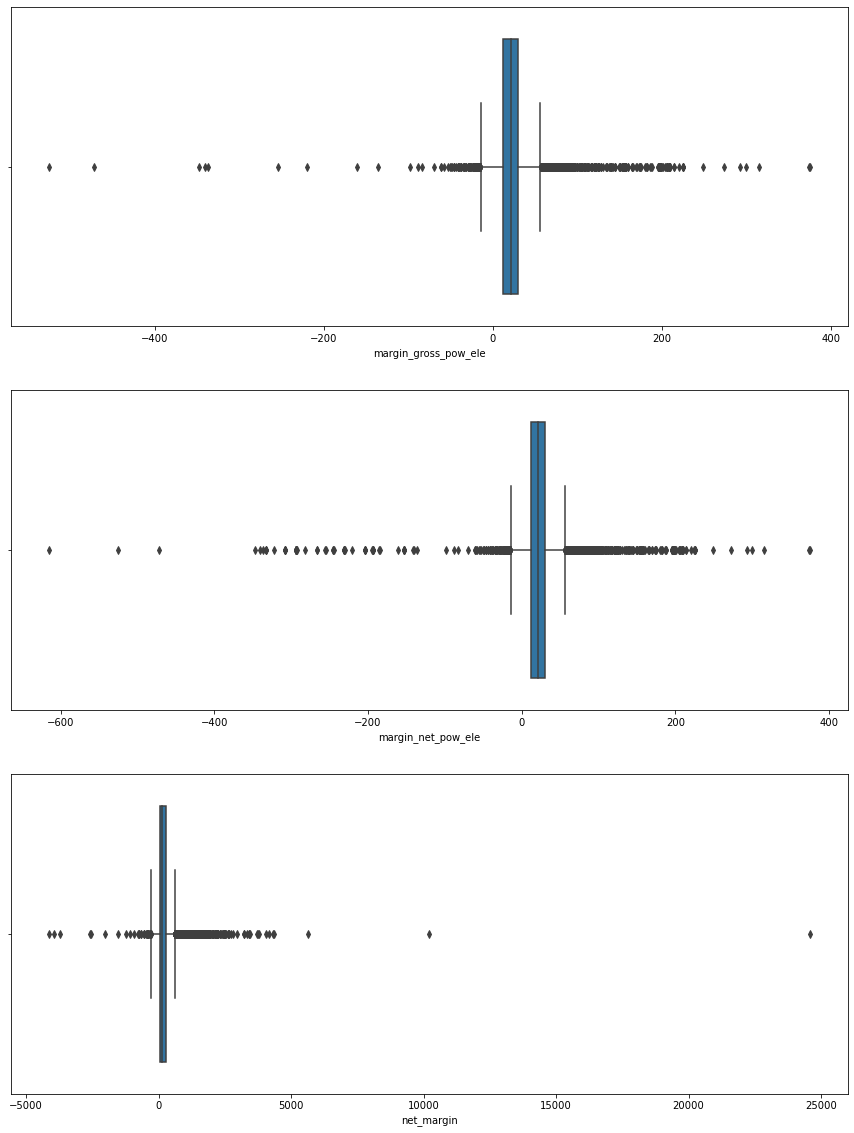

In [32]:
margin=train_set[['id','margin_gross_pow_ele',
                 'margin_net_pow_ele','net_margin']]
fig,axes=plt.subplots(nrows=3,figsize=(15,20))
sns.boxplot(margin['margin_gross_pow_ele'],ax=axes[0])
sns.boxplot(margin['margin_net_pow_ele'],ax=axes[1])
sns.boxplot(margin['net_margin'],ax=axes[2])

axes[0].ticklabel_format(style='plain',axis='x')
axes[1].ticklabel_format(style='plain',axis='x')
axes[2].ticklabel_format(style='plain',axis='x')
plt.show()

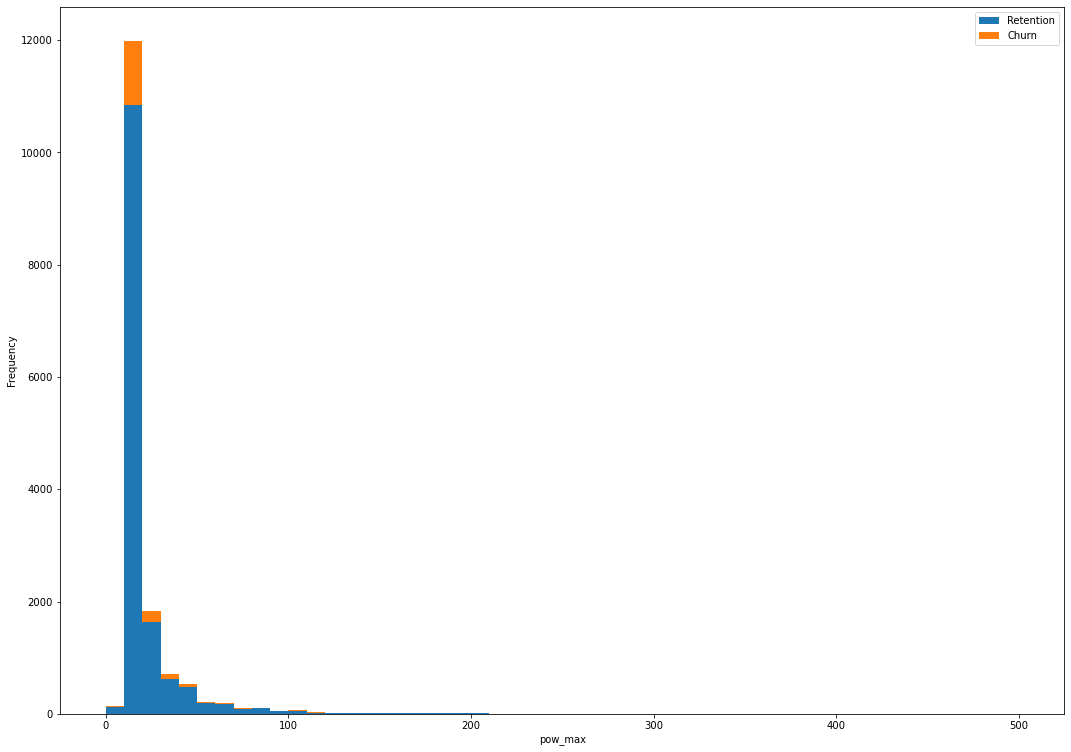

In [33]:
power=train_set[['id','pow_max','churn']].fillna(0)
fig,axes=plt.subplots(nrows=1,figsize=(18,13))
plotdist(power,'pow_max',axes)

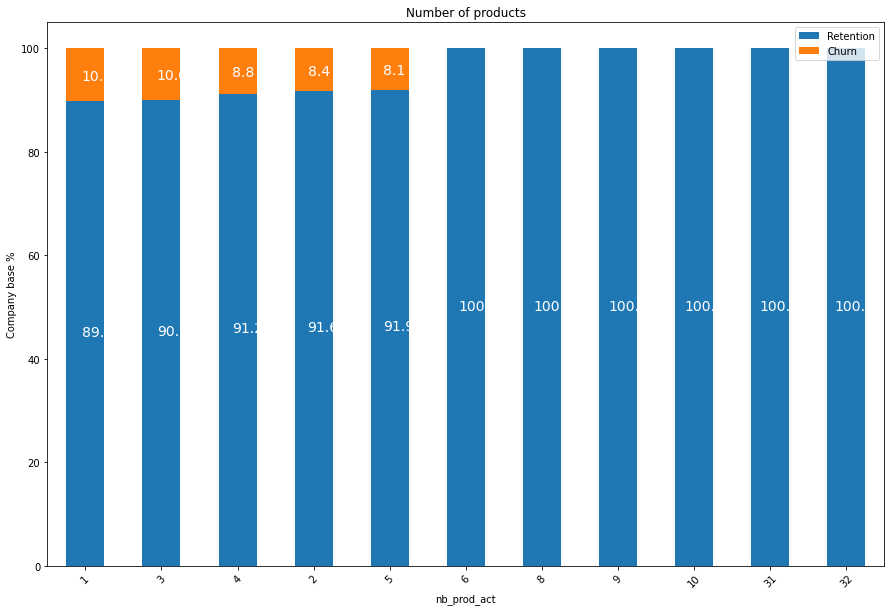

In [34]:
others=train_set[['id','nb_prod_act','num_years_antig','origin_up',
            'churn']]
products=others.groupby([others['nb_prod_act'],others['churn']])['id'].count().unstack(level=1)
products_percentage=(products.div(products.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
plotstacked(products_percentage,'Number of products')

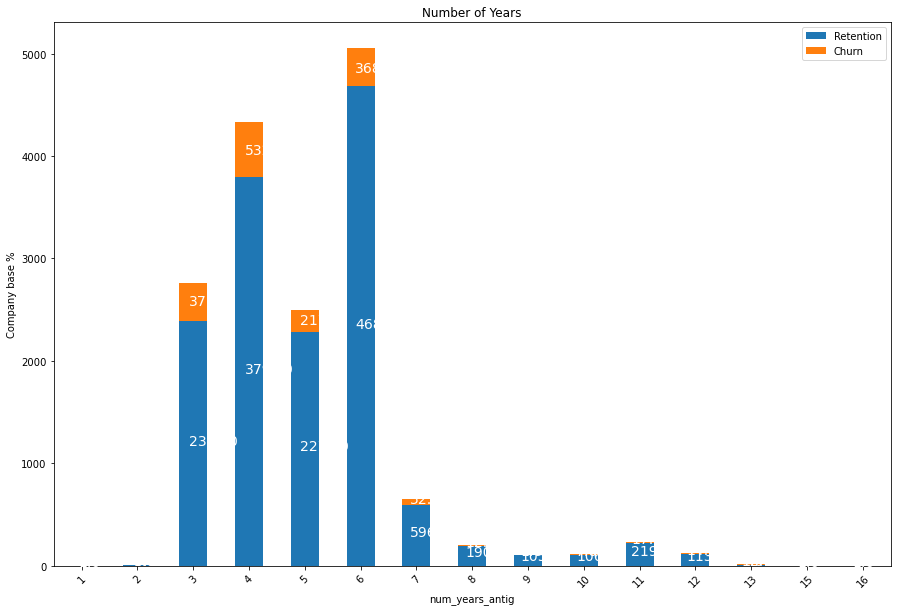

In [35]:
yearsantig=others.groupby([others['num_years_antig'],others['churn']])['id'].count().unstack(level=1)
yearsantigper=(yearsantig.div(yearsantig.sum(axis=1),axis=0)*100)
plotstacked(yearsantig,'Number of Years')

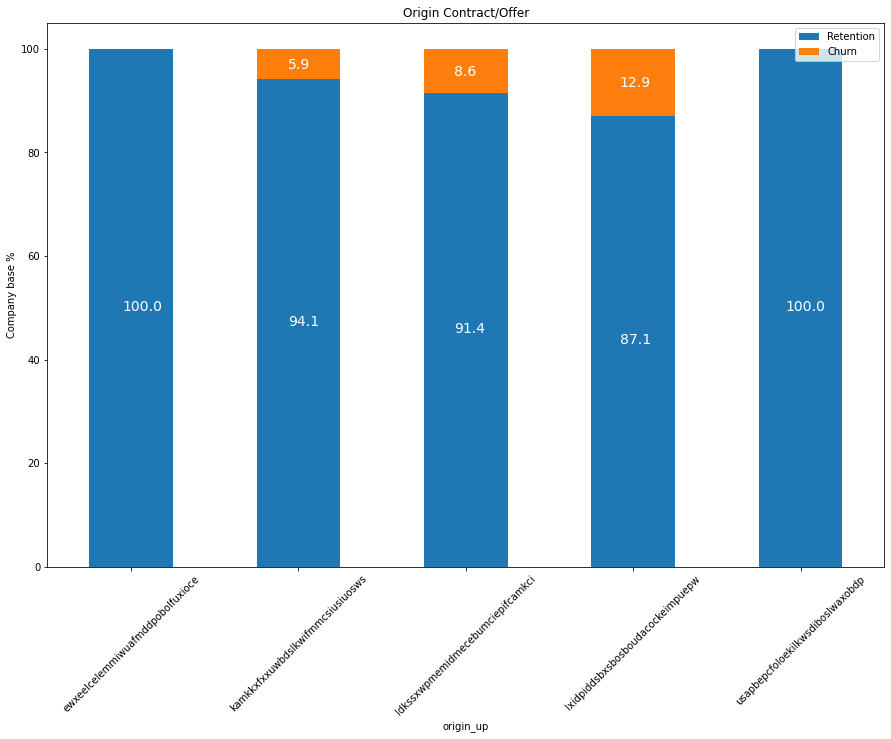

In [36]:
origin=others.groupby([others['origin_up'],others['churn']])['id'].count().unstack(level=1)
originper=(origin.div(origin.sum(axis=1),axis=0)*100)
plotstacked(originper,'Origin Contract/Offer')


## Data Cleaning

Text(0.5, 1.0, 'Plottng missing data in training set')

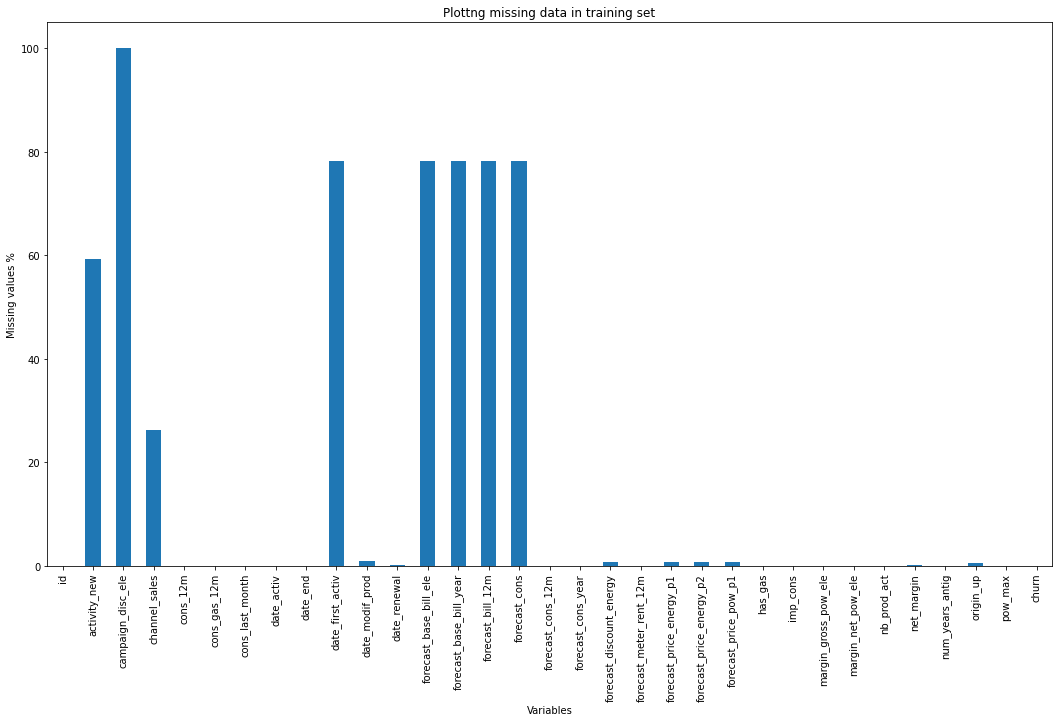

In [37]:
(train_set.isnull().sum()/len(train_set.index)*100).plot(kind='bar',figsize=(18,10))
plt.xlabel('Variables')
plt.ylabel('Missing values %')
plt.title('Plottng missing data in training set')

In [38]:
train_set.drop(columns=['campaign_disc_ele','date_first_activ',
                  'forecast_base_bill_ele','forecast_base_bill_year',
                  'forecast_bill_12m','forecast_cons'],inplace=True)

In [39]:
pd.DataFrame({'DataFrame Columns':train_set.columns})

,DataFrame Columns
0,id
1,activity_new
2,channel_sales
3,cons_12m
4,cons_gas_12m
5,cons_last_month
6,date_activ
7,date_end
8,date_modif_prod
9,date_renewal


In [40]:
train_set.loc[train_set['date_modif_prod'].isnull,'date_modif_prod']=train_set['date_modif_prod'].value_counts().index[0]
train_set.loc[train['date_end'].isnull(),'date_end']=train_set['date_end'].value_counts().index[0]
train_set.loc[train['date_renewal'].isnull(),'date_renewal']=train_set['date_renewal'].value_counts().index[0]

TypeError: isnull() takes 1 positional argument but 2 were given

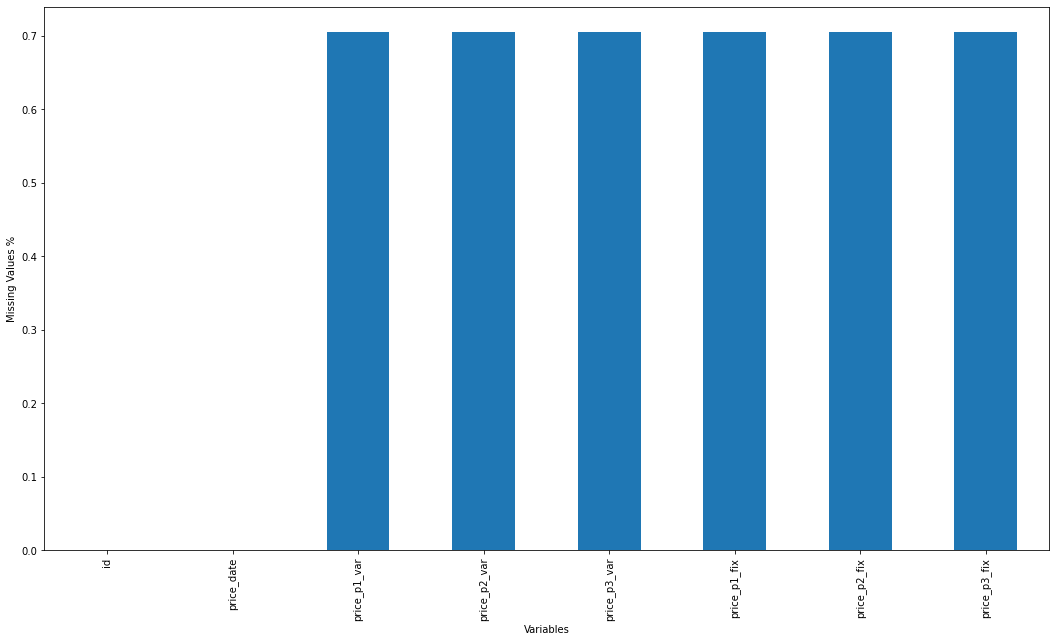

In [42]:
missing_data_per=Hist.isnull().sum()/len(Hist.index)*100
missing_data_per.plot(kind='bar',figsize=(18,10))
plt.xlabel('Variables')
plt.ylabel('Missing Values %')
plt.show()

In [43]:
Hist.loc[Hist['price_p1_var'].isnull(),'price_p1_var']=Hist['price_p1_var'].median()
Hist.loc[Hist['price_p2_var'].isnull(),'price_p2_var']=Hist['price_p2_var'].median()
Hist.loc[Hist['price_p3_var'].isnull(),'price_p3_var']=Hist['price_p3_var'].median()
Hist.loc[Hist['price_p1_fix'].isnull(),'price_p1_fix']=Hist['price_p1_fix'].median()
Hist.loc[Hist['price_p2_fix'].isnull(),'price_p2_fix']=Hist['price_p2_fix'].median()
Hist.loc[Hist['price_p3_fix'].isnull(),'price_p3_fix']=Hist['price_p3_fix'].median()


<AxesSubplot:xlabel='imp_cons'>

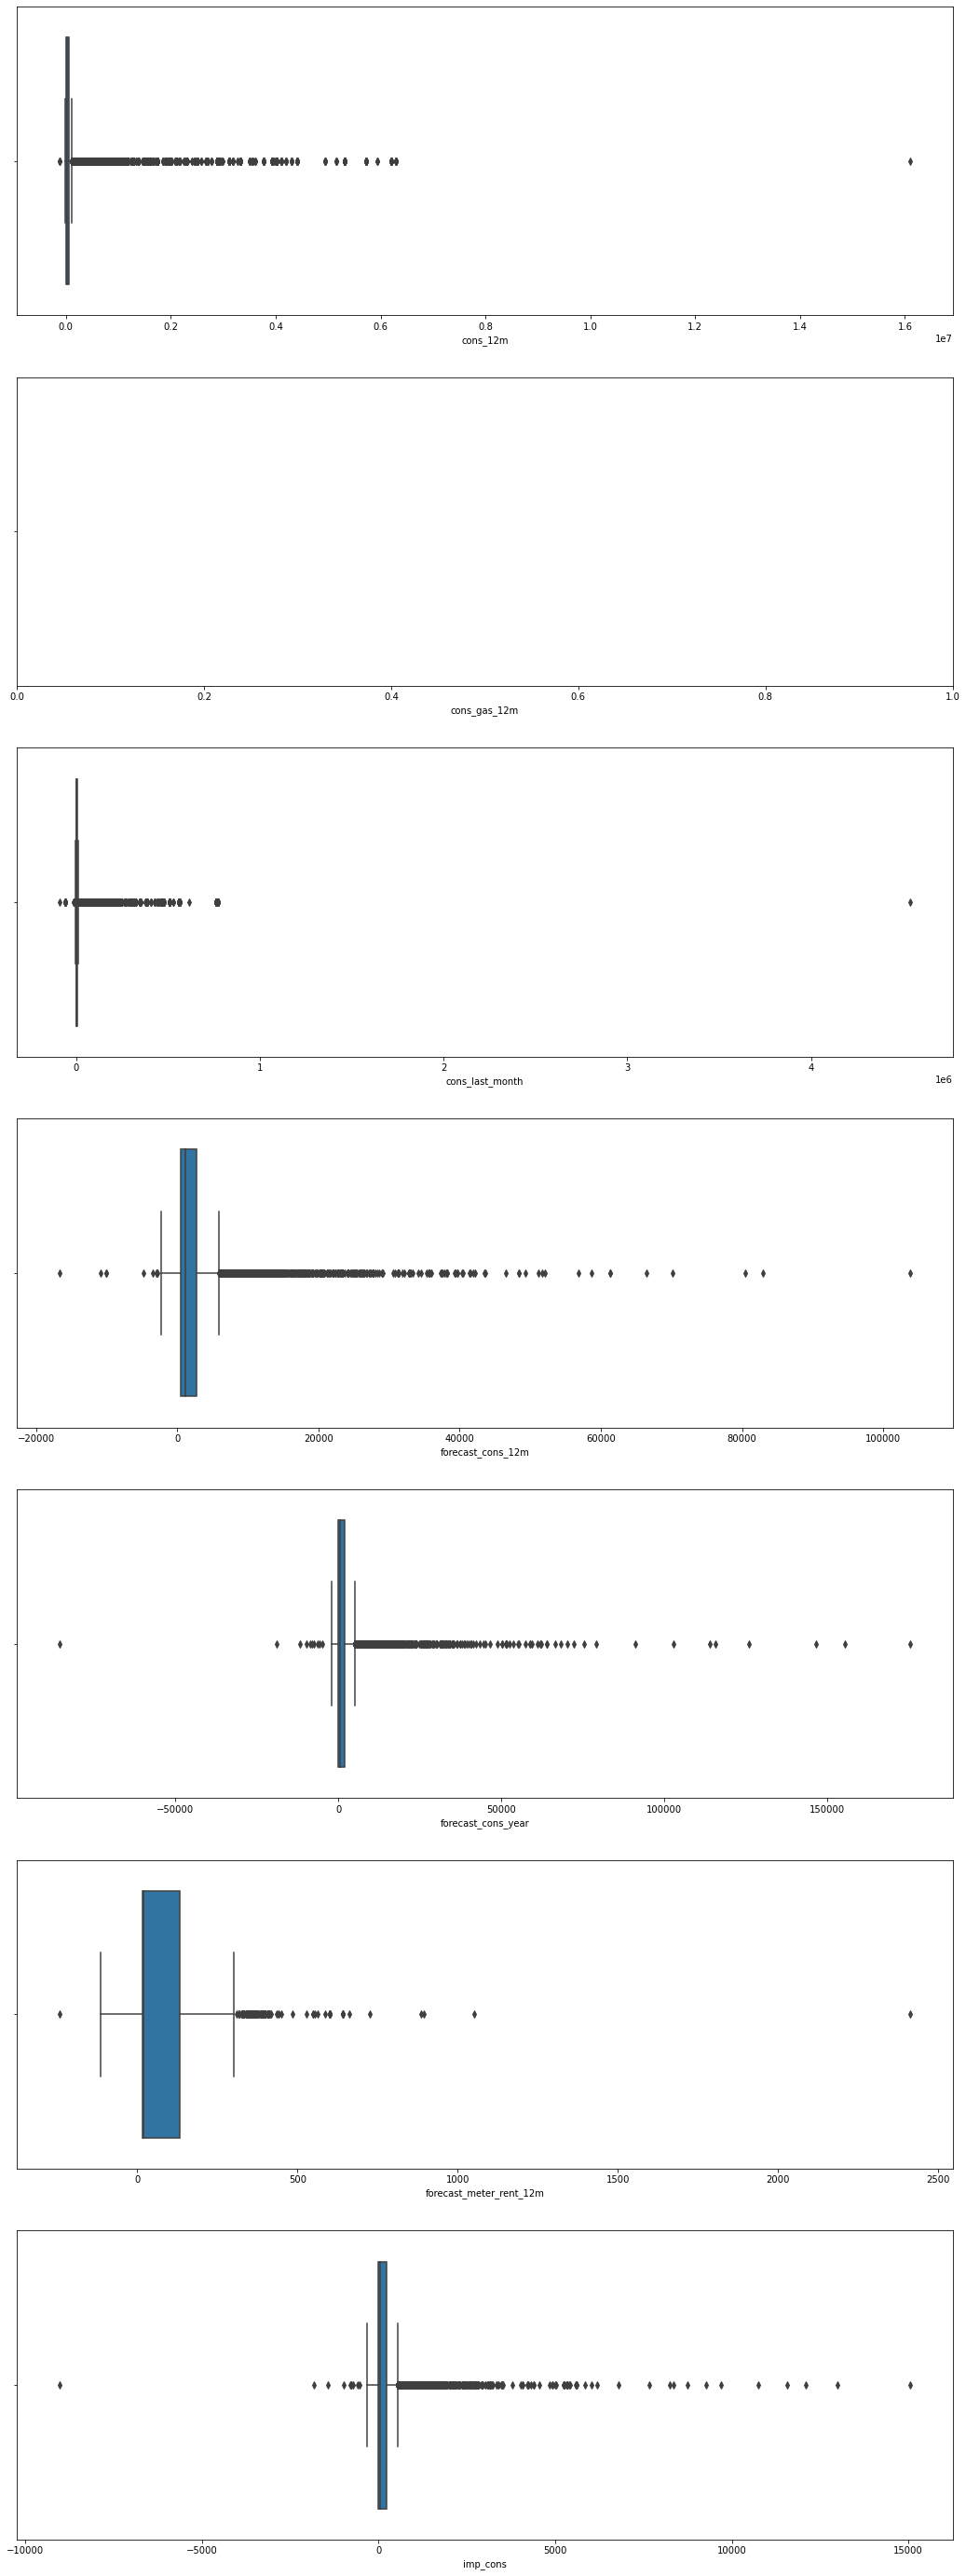

In [44]:
fig,axes=plt.subplots(nrows=7,figsize=(18,50))
sns.boxplot((train_set['cons_12m'].dropna()),ax=axes[0])
sns.boxplot((train_set[train_set['has_gas']==1]['cons_gas_12m'].dropna()),ax=axes[1])
sns.boxplot((train_set['cons_last_month'].dropna()),ax=axes[2])
sns.boxplot((train_set['forecast_cons_12m'].dropna()),ax=axes[3])
sns.boxplot((train_set['forecast_cons_year'].dropna()),ax=axes[4])
sns.boxplot((train_set['forecast_meter_rent_12m'].dropna()),ax=axes[5])
sns.boxplot((train_set['imp_cons'].dropna()),ax=axes[6])


In [45]:
Hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [46]:
Hist[(Hist.price_p1_fix<0)|(Hist.price_p2_fix<0)|(Hist.price_p3_fix<0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
